<a href="https://colab.research.google.com/github/GrizzlyToast/ML_Practise/blob/main/COMP551_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1

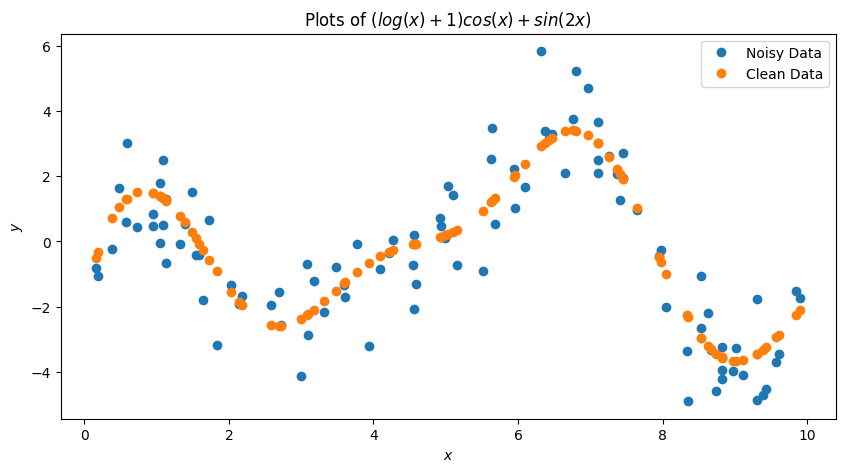

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

size = 100
# Sample 100 data points uniformly. Start from 0.1 since cannot take log of 0
# x = np.linspace(0.1, 10, size)
np.random.seed(44)
x = np.sort(np.random.uniform(0, 10, size))
# x = np.concatenate(([0.1], x_random, [10]))


epsilon = np.random.normal(0, 1, size)

y_true = (np.log(x)+1) * np.cos(x) + np.sin(2*x)

y_noisy = y_true + epsilon

plt.figure(figsize = (10,5))

plt.plot(x,y_noisy, 'o', label = "Noisy Data")
plt.plot(x,y_true,'o', label = "Clean Data")
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Plots of $(log(x) + 1 )cos(x) + sin(2x)$')
plt.legend()



In [ ]:
def transform_gaussian_basis(x, n_basis, x_min=None, x_max=None):

    if n_basis == 0:
        return x.reshape(-1, 1)

    if x_min is None:
        x_min = np.min(x)
    if x_max is None:
        x_max = np.max(x)

    mu = np.linspace(x_min, x_max, n_basis)

    if n_basis > 0:
        # spacing = (x_max - x_min) / (n_basis)
        # std = spacing * 0.5
        std = 1
    else:
        std = 1.0

    N = len(x)
    gaussian_matrix = np.zeros((N, n_basis))

    for j in range(n_basis):
        gaussian_matrix[:, j] = np.exp(-((x - mu[j]) / std)**2).ravel()

    return gaussian_matrix

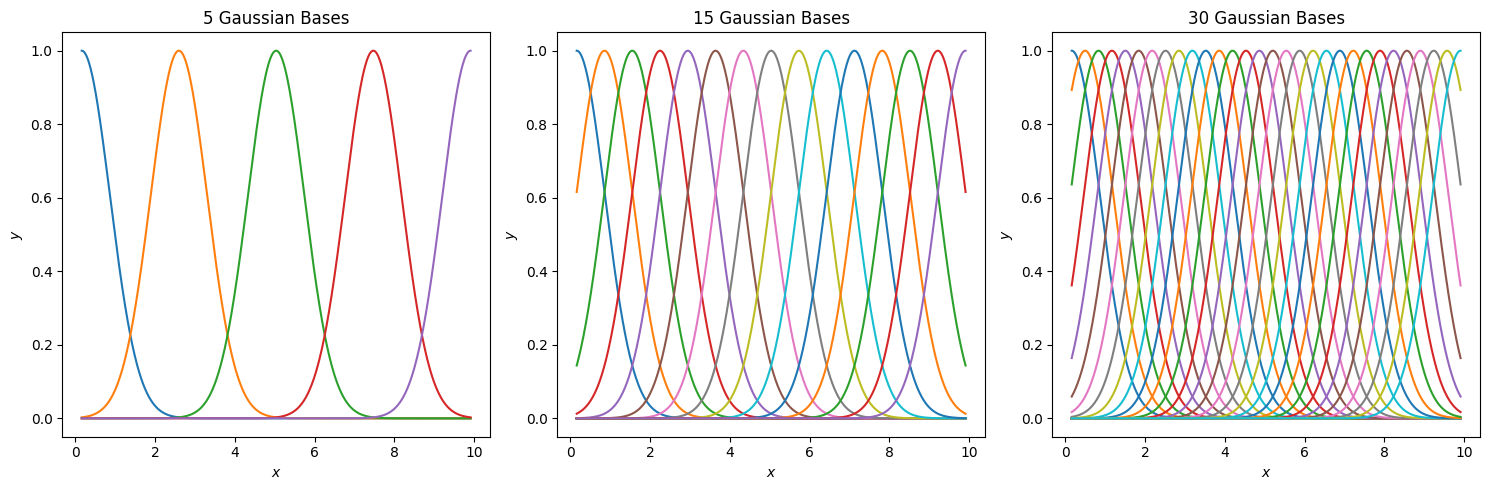

In [ ]:
def visualize_gaussian_basis_dense(x, n_basis):

    min_val = np.min(x)
    max_val = np.max(x)
    mu = np.linspace(min_val, max_val, n_basis)

    if n_basis > 1:
        # spacing = (max_val - min_val) / (n_basis - 1)
        # std = spacing * 0.5
        std = 1
    else:
        std = 1.0

    # Create dense grid for smooth visualization
    x_dense = np.linspace(min_val, max_val, 1000)

    gaussian_matrix = np.zeros((len(x_dense), n_basis))
    for j in range(n_basis):
        gaussian_matrix[:, j] = np.exp(-((x_dense - mu[j]) / std)**2)

    return x_dense, gaussian_matrix

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

x_dense, gaussians = visualize_gaussian_basis_dense(x, 5)
axes[0].plot(x_dense, gaussians)
axes[0].set_title('5 Gaussian Bases')
axes[0].set_xlabel(r'$x$')
axes[0].set_ylabel(r'$y$')

x_dense, gaussians = visualize_gaussian_basis_dense(x, 15)
axes[1].plot(x_dense, gaussians)
axes[1].set_title('15 Gaussian Bases')
axes[1].set_xlabel(r'$x$')
axes[1].set_ylabel(r'$y$')

x_dense, gaussians = visualize_gaussian_basis_dense(x, 30)
axes[2].plot(x_dense, gaussians)
axes[2].set_title('30 Gaussian Bases')
axes[2].set_xlabel(r'$x$')
axes[2].set_ylabel(r'$y$')


plt.tight_layout()
plt.savefig("gaussian_plots.svg")
plt.show()

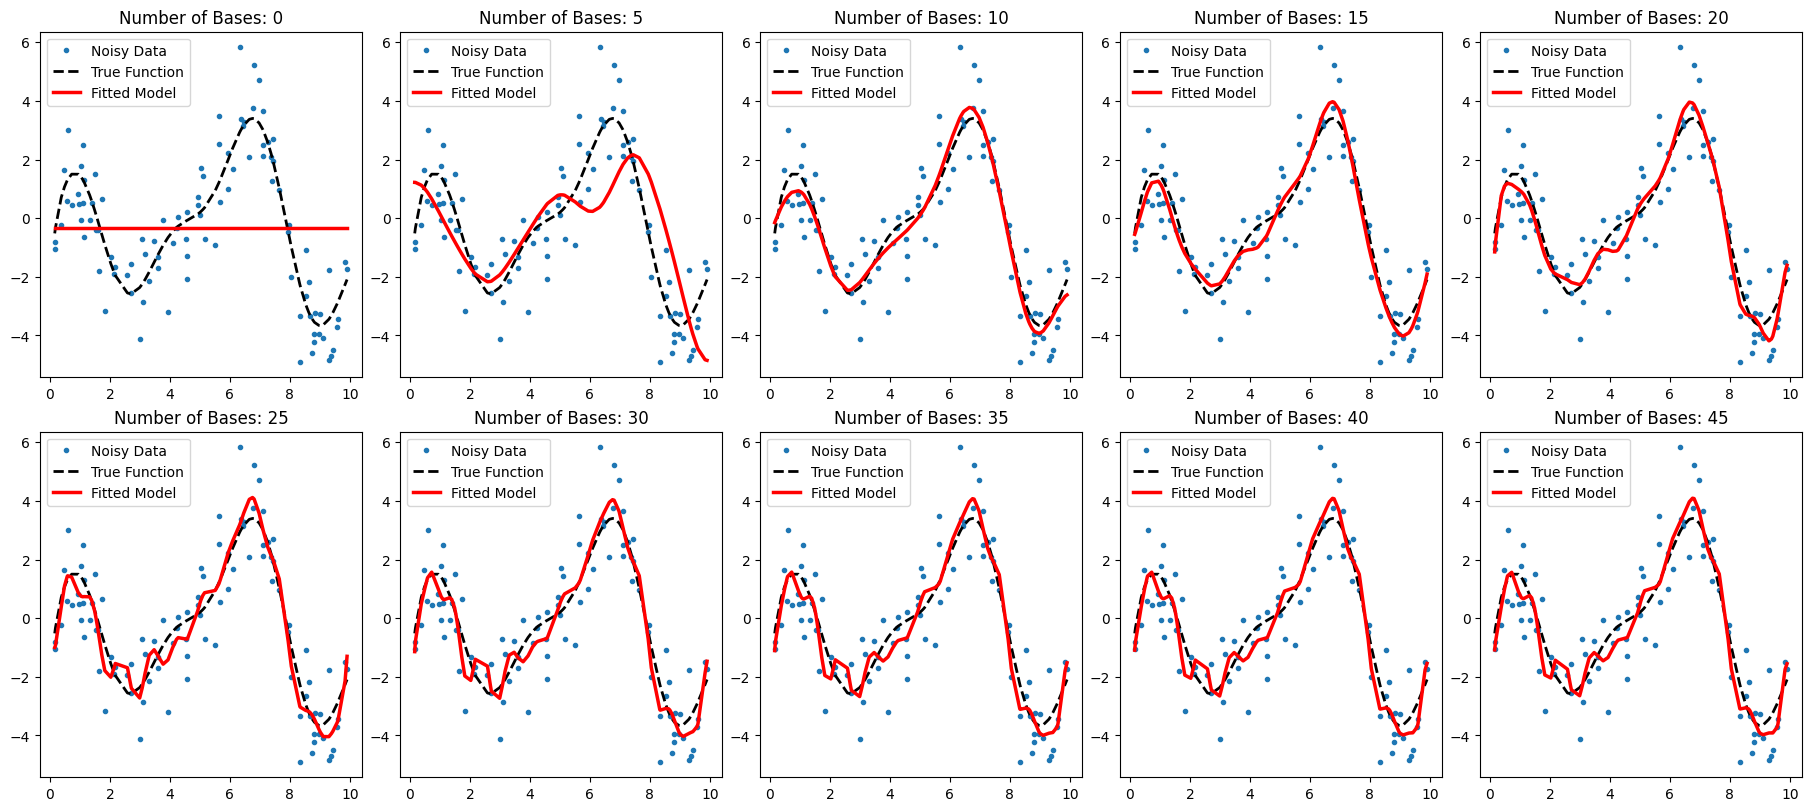

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(18, 8), constrained_layout=True)
axes = axes.flatten()

basis_counts = np.arange(0, 50, 5)

weight_history = {}
train_sses = []
true_sses = []

for i, n_basis in enumerate(basis_counts):
    ax = axes[i]

    if n_basis == 0:
        X = np.ones((len(x), 1))
    else:
        gaussian_matrix = transform_gaussian_basis(x, n_basis)

        X = np.concatenate((np.ones((len(x), 1)), gaussian_matrix), axis=1)

    # optimizer = GradientDescent(learning_rate=0.03, max_iters=10000, epsilon=1e-8)
    # model = LinearRegression()

    # w, cost_history, iterations = model.fit(X, y_noisy, optimizer)

    w = np.linalg.pinv(X.T @ X) @ X.T @ y_noisy
    y_pred = X@w

    # y_pred = model.predict(X)

    weight_history[n_basis] = w

    train_sse = np.sum((y_pred - y_noisy)**2)
    true_sse = np.sum((y_pred - y_true)**2)
    train_sses.append(train_sse)
    true_sses.append(true_sse)

    ax.plot(x, y_noisy, 'o', markersize=3, label='Noisy Data')
    ax.plot(x, y_true, 'k--', linewidth=2, label='True Function')
    ax.plot(x, y_pred, 'r-', linewidth=2.5, label='Fitted Model')

    ax.set_title(f'Number of Bases: {n_basis}')
    ax.legend()

plt.show()



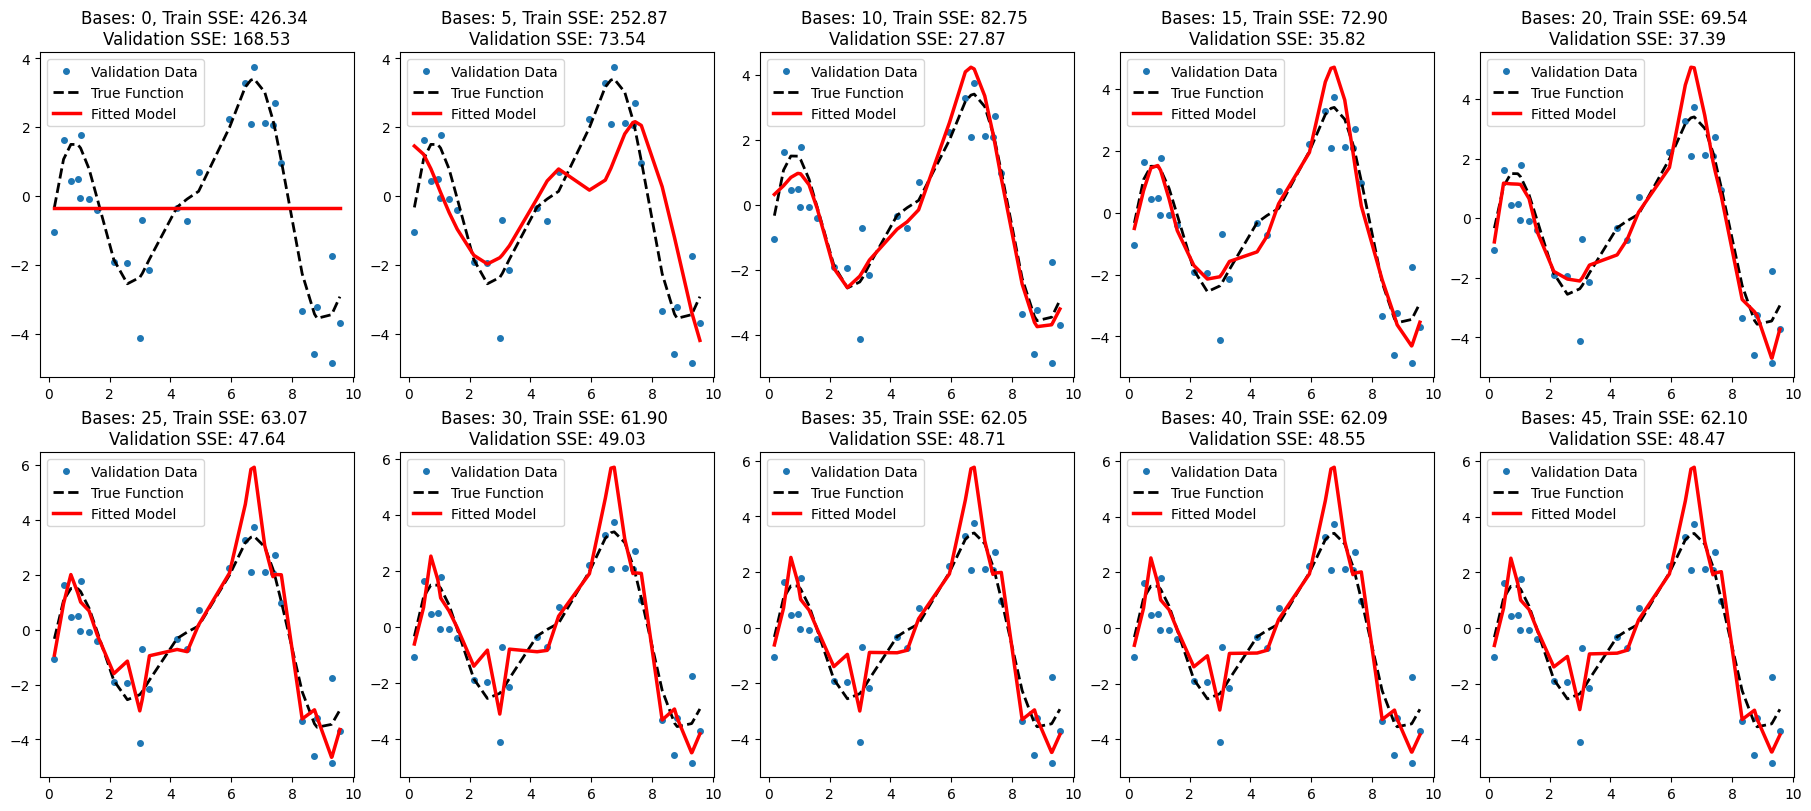

In [ ]:
n = len(x)
np.random.seed(65)
indices = np.random.permutation(n)
train_size = int(0.7 * n)
train_idx = np.sort(indices[:train_size])
validation_idx = np.sort(indices[train_size:])

x_train, x_validation = x[train_idx], x[validation_idx]
y_train, y_validation = y_noisy[train_idx], y_noisy[validation_idx]
y_true_train, y_true_validation = y_true[train_idx], y_true[validation_idx]

fig, axes = plt.subplots(2, 5, figsize=(18, 8), constrained_layout=True)
axes = axes.flatten()

basis_counts = np.arange(0, 50, 5)

weight_history = {}
train_sses = []
validation_sses = []
true_sses = []

for i, n_basis in enumerate(basis_counts):
    ax = axes[i]

    if n_basis == 0:
        gaussian_train = x_train.reshape(-1,1)
        gaussian_validation = x_validation.reshape(-1,1)

        X_train = np.ones((len(x_train), 1))
        X_validation = np.ones((len(x_validation), 1))
    else:
        x_min, x_max = x.min(), x.max()
        gaussian_train = transform_gaussian_basis(x_train, n_basis, x_min, x_max)
        gaussian_validation = transform_gaussian_basis(x_validation, n_basis, x_min, x_max)

        X_train = np.concatenate((np.ones((len(x_train), 1)), gaussian_train), axis=1)
        X_validation = np.concatenate((np.ones((len(x_validation), 1)), gaussian_validation), axis=1)


    w = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ y_train

    y_pred_train = X_train @ w
    y_pred_validation = X_validation @ w

    weight_history[n_basis] = w

    train_sse = np.sum((y_pred_train - y_train) ** 2)
    validation_sse = np.sum((y_pred_validation - y_validation) ** 2)

    train_sses.append(train_sse)
    validation_sses.append(validation_sse)

    ax.plot(x_validation, y_validation, 'o', markersize=4, label='Validation Data')
    ax.plot(x_validation, y_true_validation, 'k--', linewidth=2, label='True Function')
    ax.plot(x_validation, y_pred_validation, 'r-', linewidth=2.5, label='Fitted Model')

    ax.set_title(f'Bases: {n_basis}, Train SSE: {train_sse:.2f} \nValidation SSE: {validation_sse:.2f}')
    ax.legend()


plt.show()

#

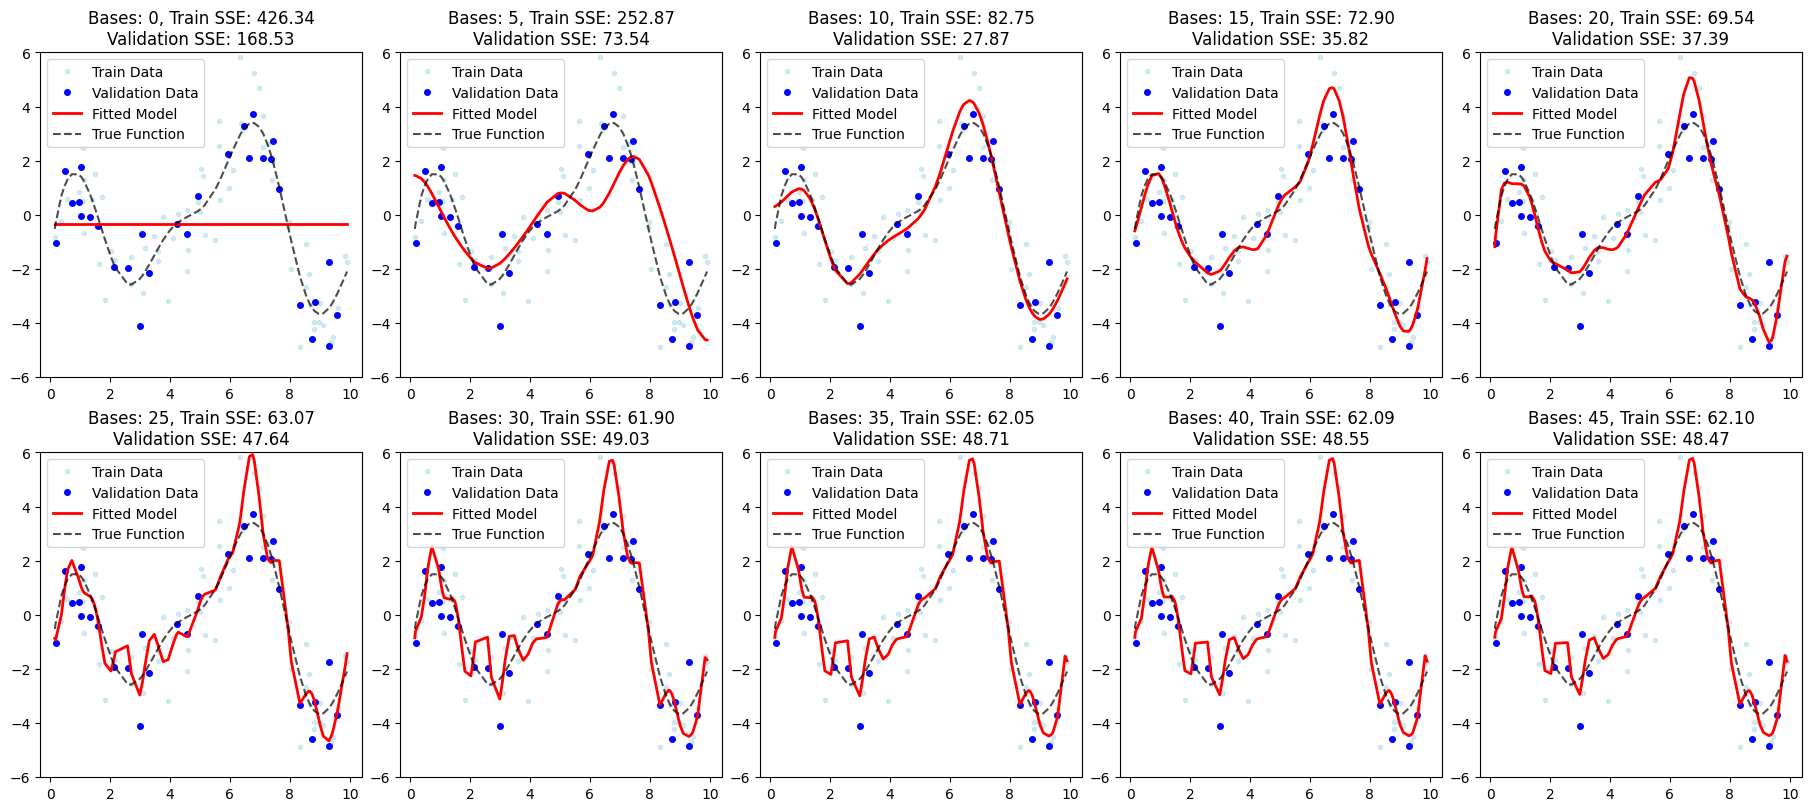

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(18, 8), constrained_layout=True)
axes = axes.flatten()

basis_counts = np.arange(0, 50, 5)

for i, n_basis in enumerate(basis_counts):
    ax = axes[i]

    if n_basis == 0:
        X_train = np.ones((len(x_train), 1))
        X_validation = np.ones((len(x_validation), 1))
    else:
        x_min, x_max = x.min(), x.max()
        gaussian_train = transform_gaussian_basis(x_train, n_basis, x_min, x_max)
        gaussian_validation = transform_gaussian_basis(x_validation, n_basis, x_min, x_max)

        X_train = np.concatenate((np.ones((len(x_train), 1)), gaussian_train), axis=1)
        X_validation = np.concatenate((np.ones((len(x_validation), 1)), gaussian_validation), axis=1)

    w = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ y_train

    y_pred_train = X_train @ w
    y_pred_validation = X_validation @ w

    train_sse = np.sum((y_pred_train - y_train) ** 2)
    validation_sse = np.sum((y_pred_validation - y_validation) ** 2)

    ax.plot(x_train, y_train, 'o', markersize=3, alpha=0.5, label='Train Data', color='lightblue')
    ax.plot(x_validation, y_validation, 'o', markersize=4, label='Validation Data', color='blue')



    if n_basis == 0:
        X_plot = np.ones((len(x), 1))
    else:
        gaussian_plot = transform_gaussian_basis(x, n_basis, x_min, x_max)
        X_plot = np.concatenate((np.ones((len(x), 1)), gaussian_plot), axis=1)

    y_pred_plot = X_plot @ w

    ax.plot(x, y_pred_plot, 'r-', linewidth=2, label='Fitted Model')
    ax.plot(x, y_true, 'k--', linewidth=1.5, label='True Function', alpha=0.7)



    ax.set_title(f'Bases: {n_basis}, Train SSE: {train_sse:.2f}\nValidation SSE: {validation_sse:.2f}')
    ax.legend()
    ax.set_ylim([-6, 6])

plt.savefig("regression_bases.svg")

plt.show()

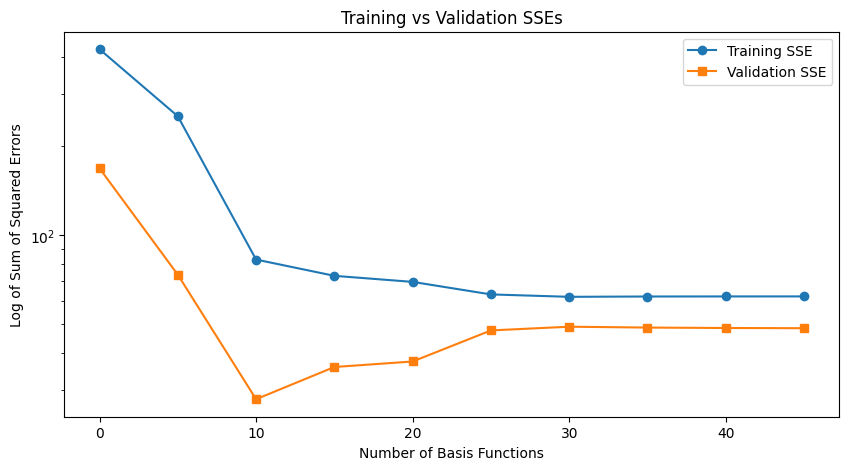

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(basis_counts, train_sses, 'o-', label='Training SSE')
plt.plot(basis_counts, validation_sses, 's-', label='Validation SSE')
plt.xlabel('Number of Basis Functions')
plt.ylabel('Log of Sum of Squared Errors')
plt.yscale('log')
# plt.ylim([0,1e4])
plt.title('Training vs Validation SSEs')
plt.legend()
plt.show()


# Task 2

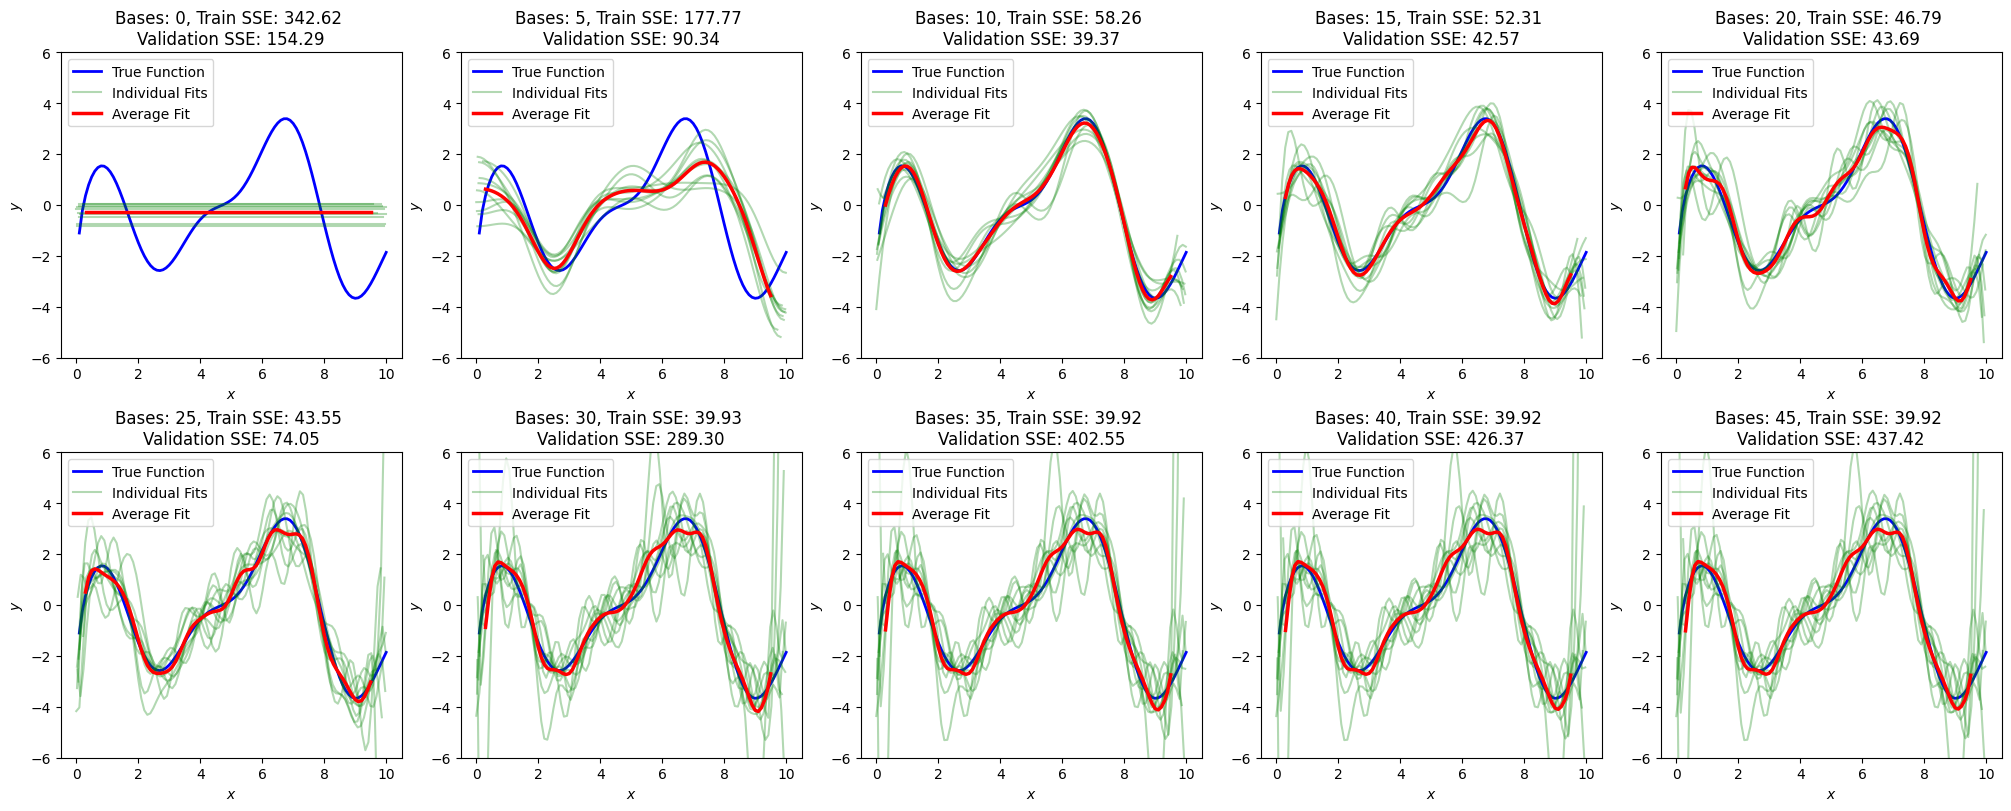

In [ ]:
from scipy.interpolate import interp1d
np.random.seed(66)

size = 100
repetitions = 10
basis_counts = np.arange(0, 50, 5)

all_train_sses = {n_basis: [] for n_basis in basis_counts}
all_validation_sses = {n_basis: [] for n_basis in basis_counts}
all_validation_predictions = {n_basis: [] for n_basis in basis_counts}
all_x_validations = {n_basis: [] for n_basis in basis_counts}
all_models = {n_basis: [] for n_basis in basis_counts}

all_x_smooth = {n_basis: [] for n_basis in basis_counts}
all_smooth_predictions = {n_basis: [] for n_basis in basis_counts}

for _ in range(repetitions):

    x = np.sort(np.random.uniform(0, 10, size))
    epsilon = np.random.normal(0, 1, size)
    y_true = (np.log(x)+1) * np.cos(x) + np.sin(2*x)
    y_noisy = y_true + epsilon


    n = len(x)
    indices = np.random.permutation(n)
    train_size = int(0.7 * n)
    train_idx = np.sort(indices[:train_size])
    validation_idx = np.sort(indices[train_size:])

    x_train, x_validation = x[train_idx], x[validation_idx]
    y_train, y_validation = y_noisy[train_idx], y_noisy[validation_idx]
    y_true_train, y_true_validation = y_true[train_idx], y_true[validation_idx]


    for n_basis in basis_counts:

        if n_basis == 0:
            gaussian_train = x_train.reshape(-1, 1)
            gaussian_validation = x_validation.reshape(-1, 1)

            X_train = np.ones((len(x_train), 1))
            X_validation = np.ones((len(x_validation), 1))
        else:
            x_min, x_max = x.min(), x.max()
            gaussian_train = transform_gaussian_basis(x_train, n_basis, x_min, x_max)
            gaussian_validation = transform_gaussian_basis(x_validation, n_basis, x_min, x_max)

            X_train = np.concatenate((np.ones((len(x_train), 1)), gaussian_train), axis=1)
            X_validation = np.concatenate((np.ones((len(x_validation), 1)), gaussian_validation), axis=1)

        w = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ y_train

        y_pred_train = X_train @ w
        y_pred_validation = X_validation @ w

        #smooth fit functions
        x_smooth = np.linspace(x.min(), x.max(), 100)
        if n_basis == 0:
            gaussian_smooth = x_smooth.reshape(-1, 1)
            X_smooth = np.ones((len(x_smooth), 1))
        else:
          gaussian_smooth = transform_gaussian_basis(x_smooth, n_basis, x.min(), x.max())
          X_smooth = np.concatenate((np.ones((len(x_smooth), 1)), gaussian_smooth), axis=1)

        y_pred_smooth = X_smooth @ w
        # optimizer = GradientDescent(learning_rate=0.03, max_iters=10000, epsilon=1e-9)
        # model = LinearRegression()
        # model.fit(X_train, y_train, optimizer)

        # y_pred_train = model.predict(X_train)
        # y_pred_validation = model.predict(X_validation)

        train_sse = np.sum((y_pred_train - y_train) ** 2)
        validation_sse = np.sum((y_pred_validation - y_validation) ** 2)

        all_train_sses[n_basis].append(train_sse)
        all_validation_sses[n_basis].append(validation_sse)
        all_validation_predictions[n_basis].append(y_pred_validation)
        all_x_validations[n_basis].append(x_validation)
        all_models[n_basis].append(w)

        all_x_smooth[n_basis].append(x_smooth)
        all_smooth_predictions[n_basis].append(y_pred_smooth)

# Create a common x axis to calculate the average for each base
x_common = np.linspace(0.1, 10, 100)
y_true_common = (np.log(x_common)+1) * np.cos(x_common) + np.sin(2*x_common)

fig, axes = plt.subplots(2, 5, figsize=(20, 8), constrained_layout=True)
axes = axes.flatten()

for i, n_basis in enumerate(basis_counts):
    ax = axes[i]

    # Plot true function on common grid
    ax.plot(x_common, y_true_common, 'b-', linewidth=2, label='True Function')

    predictions_on_common_interpolated = []

    # Plot individual fits on their own x values
    for rep in range(repetitions):
        x_val = all_x_smooth[n_basis][rep]
        y_pred_val = all_smooth_predictions[n_basis][rep]



        if rep == 0:
            ax.plot(x_val, y_pred_val, 'g-', linewidth=1.5, alpha=0.3, label='Individual Fits')
        else:
            ax.plot(x_val, y_pred_val, 'g-', linewidth=1.5, alpha=0.3)

        # Interpolate the individual fit onto the common grid
        f = interp1d(x_val, y_pred_val, kind='linear', fill_value=np.nan, bounds_error=False)
        y_pred_common_interpolated = f(x_common)
        predictions_on_common_interpolated.append(y_pred_common_interpolated)

    # Plot average fit on common grid
    avg_pred_interpolated = np.mean(predictions_on_common_interpolated, axis=0)
    ax.plot(x_common, avg_pred_interpolated, 'r-', linewidth=2.5, label='Average Fit')

    ax.set_title(f'Bases: {n_basis}, Train SSE: {np.mean(all_train_sses[n_basis]):.2f} \nValidation SSE: {np.mean(all_validation_sses[n_basis]):.2f}')
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.set_ylim([-6,6])
    ax.legend()

plt.savefig("multiple_fits_bases.svg")
plt.show()

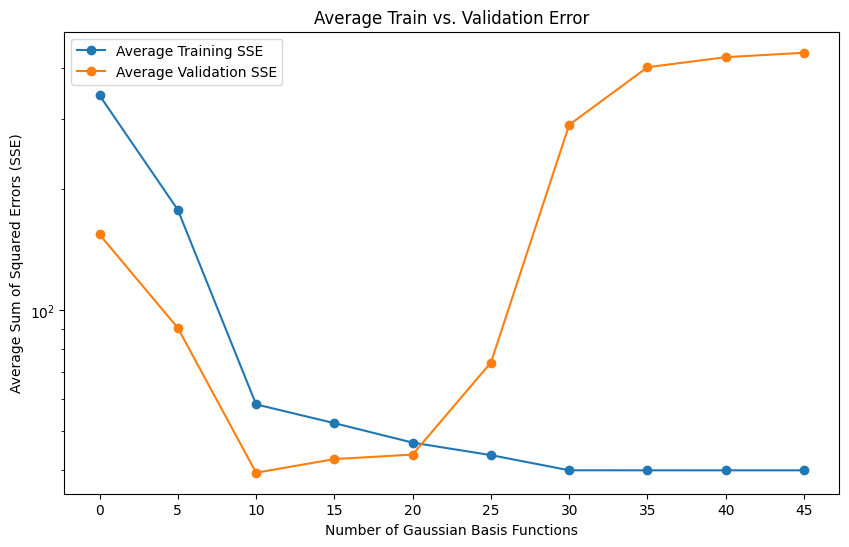

In [ ]:

avg_train_sses = [np.mean(all_train_sses[n_basis]) for n_basis in basis_counts]
avg_validation_sses = [np.mean(all_validation_sses[n_basis]) for n_basis in basis_counts]

plt.figure(figsize=(10, 6))

plt.plot(basis_counts, avg_train_sses, 'o-', label='Average Training SSE')
plt.plot(basis_counts, avg_validation_sses, 'o-', label='Average Validation SSE')

plt.xlabel('Number of Gaussian Basis Functions')
plt.ylabel('Average Sum of Squared Errors (SSE)')
plt.title('Average Train vs. Validation Error')
plt.yscale('log')
plt.xticks(basis_counts)
plt.legend()
plt.show()

# Task 3

## Task 3.1: Adding Regularization

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

size = 100
np.random.seed(197) # 197 is better seed for cross_validation_mse
x = np.sort(np.random.uniform(0, 10, size))


epsilon = np.random.normal(0, 1, size)

y_true = (np.log(x)+1) * np.cos(x) + np.sin(2*x)

y_noisy = y_true + epsilon

In [ ]:
class GradientDescent:
  def __init__(self, learning_rate=.001, max_iters=1e5, record_history=False):
    self.learning_rate = learning_rate
    self.max_iters = max_iters
    self.epsilon = epsilon
    self.record_history = record_history


    if record_history:
      self.w_history = []

  def run(self, gradient_fn, x, y, w):
    g = np.inf
    t=1
    while t < self.max_iters:
      grad = gradient_fn(x, y, w)
      w = w - self.learning_rate*grad
      if self.record_history:
        self.w_history.append(w)

      t += 1
    return w


In [ ]:
class LinearRegression:

  def __init__(self, add_bias=True, reg_type='l2', lambdaa=0):
    self.add_bias = add_bias
    self.reg_type = reg_type
    self.lambdaa = lambdaa
    pass

  def fit(self, x, y, optimizer):
    if x.ndim == 1:
      x = x[:, None]
    if self.add_bias:
      N = x.shape[0]
      x = np.column_stack([np.ones(N), x])
    N, D = x.shape

    def gradient(x, y, w):
      yh = np.dot(x, w)
      grad = np.dot(x.T, yh - y)/N
      if self.reg_type == 'l1':
        grad[1:] += self.lambdaa * np.sign(w[1:]) # exclude penalization of the bias term
      elif self.reg_type == 'l2':
        grad[1:] += self.lambdaa * w[1:]  # exclude penalization of the bias term
      return grad

    w0 = np.zeros(D)
    self.w = optimizer.run(gradient, x, y, w0)
    return self

  def predict(self, x):
    if self.add_bias:
      N = x.shape[0]
      x = np.column_stack([np.ones(N), x])
    yh = np.dot(x, self.w)
    return yh

## Task 3.2: Cross-Validation

In [ ]:
def cross_validation(n, n_folds):
  n_val = n // n_folds
  inds = np.random.permutation(n)
  inds = []
  for f in range(n_folds):
    tr_inds = []
    val_inds = list(range(f* n_val, (f + 1) * n_val))
    if f > 0:
      tr_inds = list(range(f * n_val)) # [train : val]
    if f < n_folds - 1:
      tr_inds += list(range((f + 1) * n_val, n)) # [val : train]
    yield tr_inds, val_inds

In [ ]:
def MSE(y_true, y_pred):
  return np.mean((y_true - y_pred)**2)

## Task 3.3: Plotting Train & Validation Errors

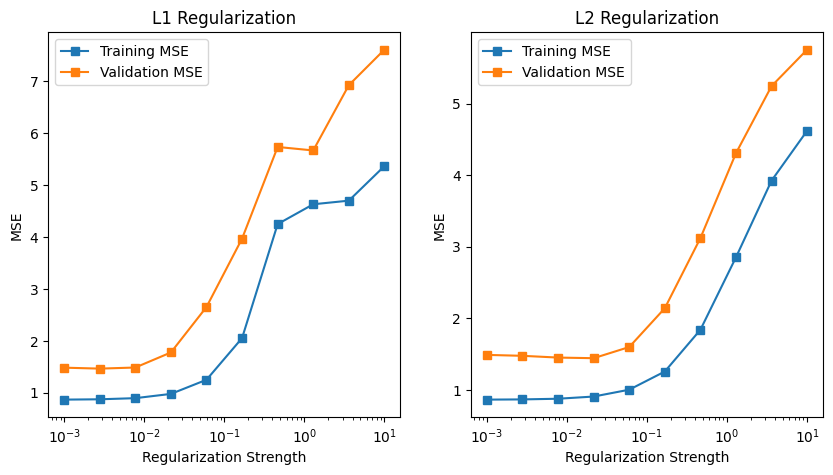

In [ ]:
N = x.shape[0]
num_folds = 10
reg_strengths = np.logspace(-3, 1, 10)

gaussian = transform_gaussian_basis(x, 45, )

# Plots in the report were generated with:
# learning rate = 0.01
# epochs = 500,000
# Took 6 minutes to run
optimizer = GradientDescent(learning_rate=0.1, max_iters=500)

l1_training_MSE = np.zeros((len(reg_strengths), num_folds))
l1_validation_MSE = np.zeros((len(reg_strengths), num_folds))
l2_training_MSE = np.zeros((len(reg_strengths), num_folds))
l2_validation_MSE = np.zeros((len(reg_strengths), num_folds))

# Perform Cross Validation
for i, reg_strength in enumerate(reg_strengths):
  for f, (tr, val) in enumerate(cross_validation(N, num_folds)):
      train_x, train_y = gaussian[tr], y_noisy[tr]
      valid_x, valid_y = gaussian[val], y_noisy[val]

      l1_model = LinearRegression(reg_type='l1', lambdaa=reg_strength)
      l2_model = LinearRegression(reg_type='l2', lambdaa=reg_strength)

      l1_model.fit(train_x, train_y, optimizer)
      l2_model.fit(train_x, train_y, optimizer)

      l1_training_MSE[i, f] = MSE(train_y, l1_model.predict(train_x))
      l2_training_MSE[i, f] = MSE(train_y, l2_model.predict(train_x))

      l1_validation_MSE[i, f] = MSE(valid_y, l1_model.predict(valid_x))
      l2_validation_MSE[i, f] = MSE(valid_y, l2_model.predict(valid_x))


fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# L1 Regularization Training and Validation MSE
axes[0].plot(reg_strengths, np.mean(l1_training_MSE, axis=1), 's-', label='Training MSE')
axes[0].plot(reg_strengths, np.mean(l1_validation_MSE, axis=1), 's-', label='Validation MSE')
axes[0].set_xscale('log')
axes[0].set_xlabel('Regularization Strength')
axes[0].set_ylabel('MSE')
axes[0].set_title('L1 Regularization')
axes[0].legend()

# L2 Regularization Training and Validation MSE
axes[1].plot(reg_strengths, np.mean(l2_training_MSE, axis=1), 's-', label='Training MSE')
axes[1].plot(reg_strengths, np.mean(l2_validation_MSE, axis=1), 's-', label='Validation MSE')
axes[1].set_xscale('log')
axes[1].set_xlabel('Regularization Strength')
axes[1].set_ylabel('MSE')
axes[1].set_title('L2 Regularization')
axes[1].legend()

plt.savefig("l1_l2_regularisation_cv.svg")

plt.show()

## Task 3.4: Plotting Bias-Variance Decomposition

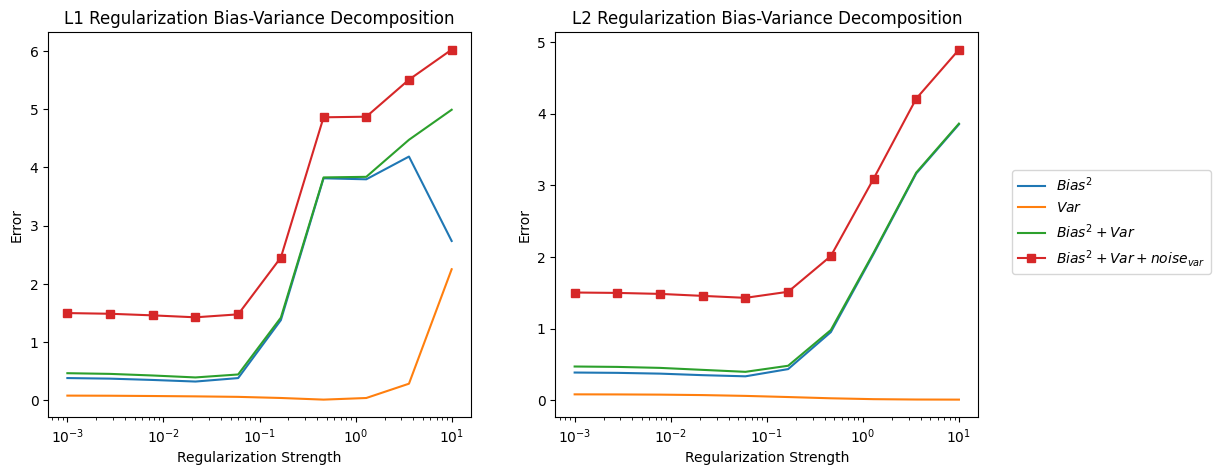

In [ ]:
N = 100
repetitions = 10
reg_strengths = np.logspace(-3, 1, 10)
n_basis = 45


optimizer = GradientDescent(learning_rate=0.1, max_iters=500)

l1_test_predictions = {reg: [] for reg in reg_strengths}
l2_test_predictions = {reg: [] for reg in reg_strengths}
epsilons = []

# Split data into training and test sets
train_size = int(0.7 * N)
test_size = N - train_size

# Training set
x_train = np.sort(np.random.uniform(0.1, 10, train_size))
gaussian_x_train = transform_gaussian_basis(x_train, n_basis)
y_true_train = (np.log(x_train)+1) * np.cos(x_train) + np.sin(2*x_train)

# Test set
x_test = np.sort(np.random.uniform(0.1, 10, test_size))
gaussian_x_test = transform_gaussian_basis(x_test, n_basis)
y_true_test = (np.log(x_test)+1) * np.cos(x_test) + np.sin(2*x_test)

for _ in range(repetitions):
  # Generate new data set (epsilon is the only random variable)
    epsilon_train = np.random.normal(0, 1, train_size)
    y_noisy_train = y_true_train + epsilon_train

    epsilons.append(epsilon_train)

    for reg in reg_strengths:
        l1_model = LinearRegression(reg_type='l1', lambdaa=reg)
        l2_model = LinearRegression(reg_type='l2', lambdaa=reg)

        l1_model.fit(gaussian_x_train, y_noisy_train, optimizer)
        l2_model.fit(gaussian_x_train, y_noisy_train, optimizer)

        l1_test_predictions[reg].append(l1_model.predict(gaussian_x_test))
        l2_test_predictions[reg].append(l2_model.predict(gaussian_x_test))

# Calculate Bias and Variance
l1_biases = []
l2_biases = []
l1_variances = []
l2_variances = []

for reg in reg_strengths:
    l1_avg_prediction = np.mean(l1_test_predictions[reg], axis=0)
    l2_avg_prediction = np.mean(l2_test_predictions[reg], axis=0)

    l1_bias = np.mean((l1_avg_prediction - y_true_test)**2)
    l2_bias = np.mean((l2_avg_prediction - y_true_test)**2)

    l1_variance = np.mean(np.var(l1_test_predictions[reg], axis=0))
    l2_variance = np.mean(np.var(l2_test_predictions[reg], axis=0))


    l1_biases.append(l1_bias)
    l2_biases.append(l2_bias) # Corrected this to l2_bias

    l1_variances.append(l1_variance)
    l2_variances.append(l2_variance)


# Plotting Bias-Variance Decomposition
fig, axes = plt.subplots(1, 2, figsize=(12, 5)) # Adjusted figsize for legend

# L1 Regularization Bias-Variance
axes[0].plot(reg_strengths, l1_biases, label=r'$Bias^2$')
axes[0].plot(reg_strengths, l1_variances, label=r'$Var$')
axes[0].plot(reg_strengths, np.array(l1_biases) + np.array(l1_variances), label=r'$Bias^2 + Var$')
axes[0].plot(reg_strengths, np.array(l1_biases) + np.array(l1_variances) + np.mean(np.var(epsilons, axis=1)), 's-', label=r'$Bias^2 + Var + noise_{var}$')
axes[0].set_xscale('log')
axes[0].set_xlabel('Regularization Strength')
axes[0].set_ylabel('Error')
axes[0].set_title('L1 Regularization Bias-Variance Decomposition')


# L2 Regularization Bias-Variance
axes[1].plot(reg_strengths, l2_biases, label=r'$Bias^2$')
axes[1].plot(reg_strengths, l2_variances, label=r'$Var$')
axes[1].plot(reg_strengths, np.array(l2_biases) + np.array(l2_variances), label=r'$Bias^2 + Var$')
axes[1].plot(reg_strengths, np.array(l2_biases) + np.array(l2_variances) + np.mean(np.var(epsilons, axis=1)), 's-', label=r'$Bias^2 + Var + noise_{var}$')
axes[1].set_xscale('log')
axes[1].set_xlabel('Regularization Strength')
axes[1].set_ylabel('Error')
axes[1].set_title('L2 Regularization Bias-Variance Decomposition')

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right', bbox_to_anchor=(1.1, 0.5))

# plt.subplots_adjust(right=0.8)

plt.savefig("single_regularization_decomposition.svg", bbox_inches='tight')
plt.show()

### Extension: K-fold Bias Variance

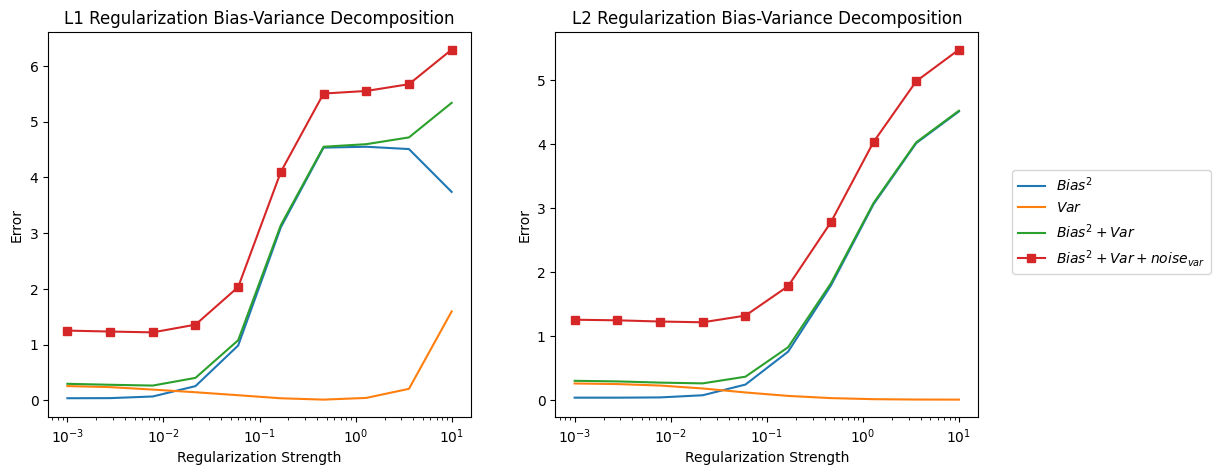

In [ ]:
N = 100
repetitions = 10
reg_strengths = np.logspace(-3, 1, 10)
num_folds = 10

l1_average_models = {reg: [] for reg in reg_strengths}
l2_average_models = {reg: [] for reg in reg_strengths}
epsilons = []

x = np.sort(np.random.uniform(0.1, 10, N))
y_true = (np.log(x)+1) * np.cos(x) + np.sin(2*x)

gaussian = transform_gaussian_basis(x, 45)

# Plots in the report were generated with:
# learning rate = 0.01
# epochs = 500,000
# Took 60 minutes to run

# It was noticed that with 0.1 learning rate and 50,000 epochs L1 regularized error
# had unexpected decrease in bias and increased variance at high regularizations.
# Allowing Gradient Descent to run for longer produced more reliable results as outlined in the report
optimizer = GradientDescent(learning_rate=0.1, max_iters=500)

for _ in range(repetitions):
  # Generate new data set
    epsilon = np.random.normal(0, 1, N)
    y_noisy = y_true + epsilon
    epsilons.append(epsilon)

    for i, reg_strength in enumerate(reg_strengths):
      l1_oof_predictions = np.zeros(N)
      l2_oof_predictions = np.zeros(N)

      for f, (tr, val) in enumerate(cross_validation(N, num_folds)):
          train_x, train_y = gaussian[tr], y_noisy[tr]
          valid_x, valid_y = gaussian[val], y_noisy[val]

          l1_model = LinearRegression(reg_type='l1', lambdaa=reg_strength)
          l2_model = LinearRegression(reg_type='l2', lambdaa=reg_strength)

          l1_model.fit(train_x, train_y, optimizer)
          l2_model.fit(train_x, train_y, optimizer)

          l1_oof_predictions[val] = l1_model.predict(valid_x)
          l2_oof_predictions[val] = l2_model.predict(valid_x)

      # Aggregate the Predicitons of all the Folds
      l1_average_models[reg_strength].append(l1_oof_predictions)
      l2_average_models[reg_strength].append(l2_oof_predictions)

l1_biases = []
l2_biases = []
l1_variances = []
l2_variances = []

for reg in reg_strengths:
  l1_average_model = np.mean(l1_average_models[reg], axis=0)
  l2_average_model = np.mean(l2_average_models[reg], axis=0)

  l1_bias = np.mean((l1_average_model - y_true)**2)
  l2_bias = np.mean((l2_average_model - y_true)**2)

  l1_variance = np.mean(np.var(l1_average_models[reg], axis=0))
  l2_variance = np.mean(np.var(l2_average_models[reg], axis=0))

  l1_biases.append(l1_bias)
  l2_biases.append(l2_bias)
  l1_variances.append(l1_variance)
  l2_variances.append(l2_variance)


fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# L1 Regularization Bias-Variance
axes[0].plot(reg_strengths, l1_biases, label=r'$Bias^2$')
axes[0].plot(reg_strengths, l1_variances, label=r'$Var$')
axes[0].plot(reg_strengths, np.array(l1_biases) + np.array(l1_variances), label=r'$Bias^2 + Var$')
axes[0].plot(reg_strengths, np.array(l1_biases) + np.array(l1_variances) + np.mean(np.var(epsilons, axis=1)), 's-', label=r'$Bias^2 + Var + noise_{var}$')
axes[0].set_xscale('log')
axes[0].set_xlabel('Regularization Strength')
axes[0].set_ylabel('Error')
axes[0].set_title('L1 Regularization Bias-Variance Decomposition')


# L2 Regularization Bias-Variance
axes[1].plot(reg_strengths, l2_biases, label=r'$Bias^2$')
axes[1].plot(reg_strengths, l2_variances, label=r'$Var$')
axes[1].plot(reg_strengths, np.array(l2_biases) + np.array(l2_variances), label=r'$Bias^2 + Var$')
axes[1].plot(reg_strengths, np.array(l2_biases) + np.array(l2_variances) + np.mean(np.var(epsilons, axis=1)), 's-', label=r'$Bias^2 + Var + noise_{var}$')
axes[1].set_xscale('log')
axes[1].set_xlabel('Regularization Strength')
axes[1].set_ylabel('Error')
axes[1].set_title('L2 Regularization Bias-Variance Decomposition')

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right', bbox_to_anchor=(1.1, 0.5))

# plt.subplots_adjust(right=0.8)

plt.savefig("cv_regularization_decomposition.svg", bbox_inches='tight')
plt.show()


The following code shows the cross validated graph with a learning rate of $0.1$ and $50,000$ epochs. As can be seen in the Figure, the bias and variance show unexpected behavior for high L1 regularization. A smaller learning rate and more epochs resolves this.

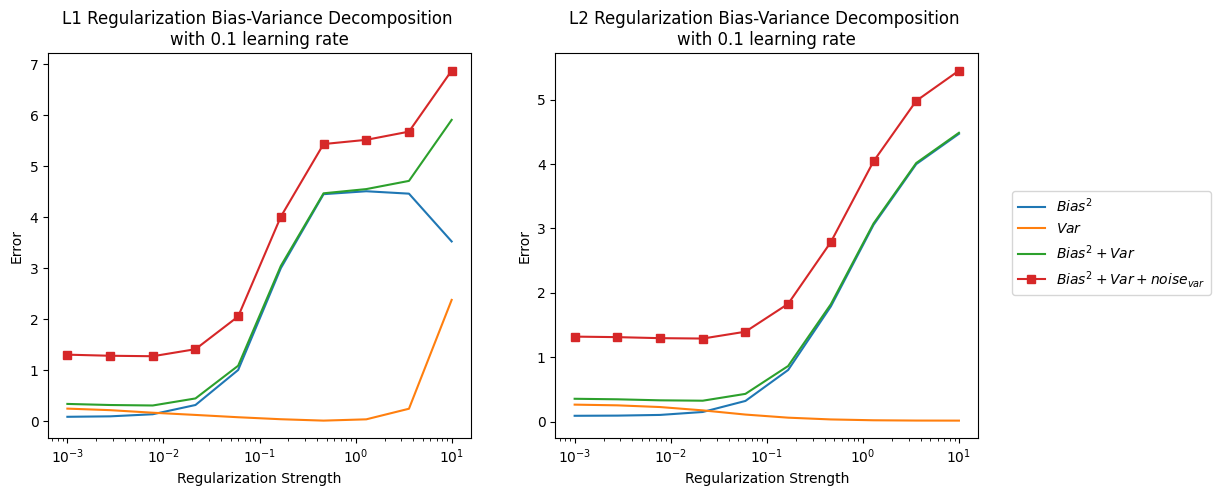

In [ ]:
N = 100
repetitions = 10
reg_strengths = np.logspace(-3, 1, 10)
num_folds = 10

l1_average_models = {reg: [] for reg in reg_strengths}
l2_average_models = {reg: [] for reg in reg_strengths}
epsilons = []

x = np.sort(np.random.uniform(0.1, 10, N))
y_true = (np.log(x)+1) * np.cos(x) + np.sin(2*x)

gaussian = transform_gaussian_basis(x, 45)


optimizer = GradientDescent(learning_rate=0.1, max_iters=500)

for _ in range(repetitions):
  # Generate new data set
    epsilon = np.random.normal(0, 1, N)
    y_noisy = y_true + epsilon
    epsilons.append(epsilon)

    for i, reg_strength in enumerate(reg_strengths):
      l1_oof_predictions = np.zeros(N)
      l2_oof_predictions = np.zeros(N)

      for f, (tr, val) in enumerate(cross_validation(N, num_folds)):
          train_x, train_y = gaussian[tr], y_noisy[tr]
          valid_x, valid_y = gaussian[val], y_noisy[val]

          l1_model = LinearRegression(reg_type='l1', lambdaa=reg_strength)
          l2_model = LinearRegression(reg_type='l2', lambdaa=reg_strength)

          l1_model.fit(train_x, train_y, optimizer)
          l2_model.fit(train_x, train_y, optimizer)

          l1_oof_predictions[val] = l1_model.predict(valid_x)
          l2_oof_predictions[val] = l2_model.predict(valid_x)

      # Aggregate the Predicitons of all the Folds
      l1_average_models[reg_strength].append(l1_oof_predictions)
      l2_average_models[reg_strength].append(l2_oof_predictions)

l1_biases = []
l2_biases = []
l1_variances = []
l2_variances = []

for reg in reg_strengths:
  l1_average_model = np.mean(l1_average_models[reg], axis=0)
  l2_average_model = np.mean(l2_average_models[reg], axis=0)

  l1_bias = np.mean((l1_average_model - y_true)**2)
  l2_bias = np.mean((l2_average_model - y_true)**2)

  l1_variance = np.mean(np.var(l1_average_models[reg], axis=0))
  l2_variance = np.mean(np.var(l2_average_models[reg], axis=0))

  l1_biases.append(l1_bias)
  l2_biases.append(l2_bias)
  l1_variances.append(l1_variance)
  l2_variances.append(l2_variance)


fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# L1 Regularization Bias-Variance
axes[0].plot(reg_strengths, l1_biases, label=r'$Bias^2$')
axes[0].plot(reg_strengths, l1_variances, label=r'$Var$')
axes[0].plot(reg_strengths, np.array(l1_biases) + np.array(l1_variances), label=r'$Bias^2 + Var$')
axes[0].plot(reg_strengths, np.array(l1_biases) + np.array(l1_variances) + np.mean(np.var(epsilons, axis=1)), 's-', label=r'$Bias^2 + Var + noise_{var}$')
axes[0].set_xscale('log')
axes[0].set_xlabel('Regularization Strength')
axes[0].set_ylabel('Error')
axes[0].set_title('L1 Regularization Bias-Variance Decomposition \nwith 0.1 learning rate')


# L2 Regularization Bias-Variance
axes[1].plot(reg_strengths, l2_biases, label=r'$Bias^2$')
axes[1].plot(reg_strengths, l2_variances, label=r'$Var$')
axes[1].plot(reg_strengths, np.array(l2_biases) + np.array(l2_variances), label=r'$Bias^2 + Var$')
axes[1].plot(reg_strengths, np.array(l2_biases) + np.array(l2_variances) + np.mean(np.var(epsilons, axis=1)), 's-', label=r'$Bias^2 + Var + noise_{var}$')
axes[1].set_xscale('log')
axes[1].set_xlabel('Regularization Strength')
axes[1].set_ylabel('Error')
axes[1].set_title('L2 Regularization Bias-Variance Decomposition \nwith 0.1 learning rate')

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right', bbox_to_anchor=(1.1, 0.5))

# plt.subplots_adjust(right=0.8)

plt.show()


# Task 4

## Task 4.1: Generating Synthetic

In [ ]:
mean, std_dev = 0, 1

eps = np.random.normal(mean, std_dev, 30)

y = lambda x: -3*x + 8 + 2 * eps

x = np.linspace(0, 10, 30)
y = y(x)

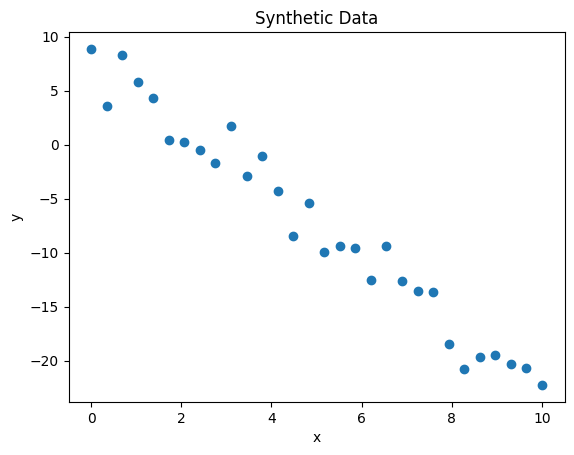

In [ ]:
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Synthetic Data')
plt.show()

## Task 4.2: Applying L1 and L2 Regularization

Functions have been defined above

## Task 4.3/4.4: Plotting the Loss Function

In [ ]:
import itertools

def plot_contour(f, x1bound, x2bound, resolution, ax):
  x1range = np.linspace(x1bound[0], x1bound[1], resolution)
  x2range = np.linspace(x2bound[0], x2bound[1], resolution)
  xg, yg = np.meshgrid(x1range, x2range)
  zg = np.zeros_like(xg)

  for i,j in itertools.product(range(resolution), range(resolution)):
    zg[i,j] = f(np.array([xg[i,j], yg[i,j]]))

  ax.contour(xg, yg, zg, 100)

  return ax

<>:18: SyntaxWarning: invalid escape sequence '\l'
<>:18: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipython-input-584189909.py:18: SyntaxWarning: invalid escape sequence '\l'
  axes[i].set_title(f'L2 Regularization with $\lambda$ = {reg_coef}')


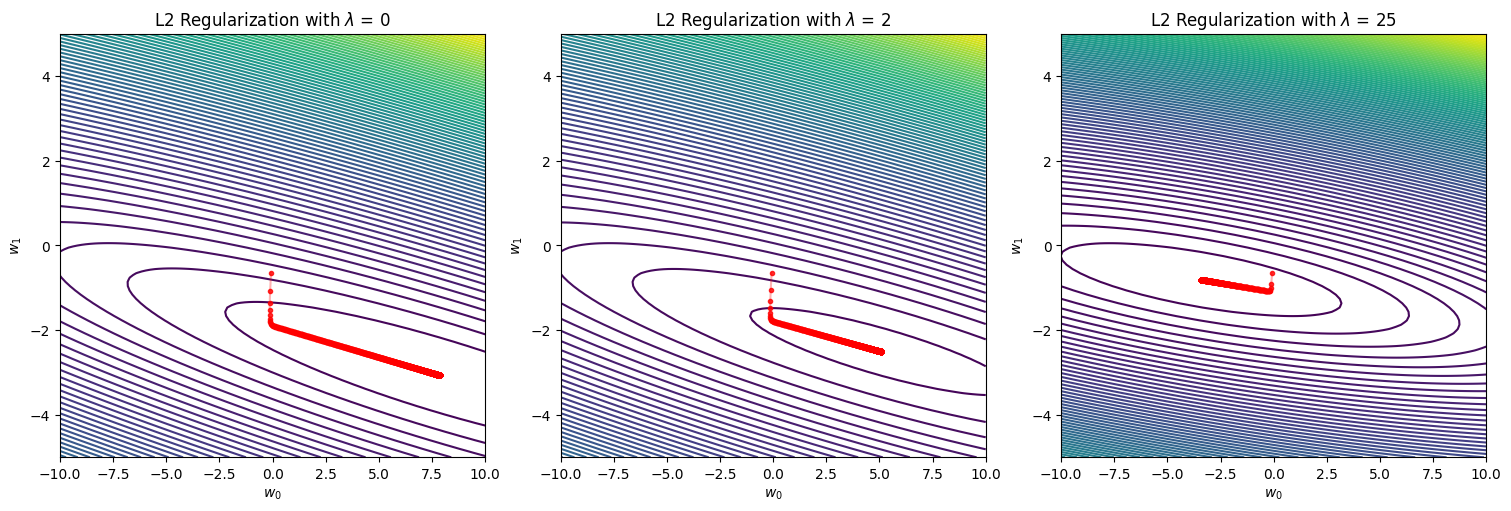

In [ ]:
cost = lambda w, reg: .5*np.mean((w[0] + w[1]*x - y)**2) + reg*np.dot(w[1],w[1])/2 # l2 loss
reg_list = [0, 2, 25]
fig, axes = plt.subplots(ncols=len(reg_list), nrows=1, constrained_layout= True, figsize=(15,5))

for i, reg_coef in enumerate(reg_list):
  optimizer = GradientDescent(learning_rate= 0.01, max_iters = 50000, record_history=True)
  model = LinearRegression(reg_type='l2', lambdaa=reg_coef)
  model.fit(x, y, optimizer)

  current_cost = lambda w: cost(w, reg_coef)
  plot_contour(current_cost, [-10, 10], [-5, 5], 100, axes[i])
  w_hist = np.vstack(optimizer.w_history)

  axes[i].plot(w_hist[:,0], w_hist[:,1], '.r', alpha=.8)
  axes[i].plot(w_hist[:,0], w_hist[:,1], '-r', alpha=.3)
  axes[i].set_xlabel(r'$w_0$')
  axes[i].set_ylabel(r'$w_1$')
  axes[i].set_title(f'L2 Regularization with $\lambda$ = {reg_coef}')
  axes[i].set_xlim([-10,10])
  axes[i].set_ylim([-5,5])

plt.savefig("l2_regularization_contour.png")
plt.show()


<>:16: SyntaxWarning: invalid escape sequence '\l'
<>:16: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipython-input-2676501260.py:16: SyntaxWarning: invalid escape sequence '\l'
  axes[i].set_title(f'L1 Regularization with $\lambda$ = {reg_coef}')


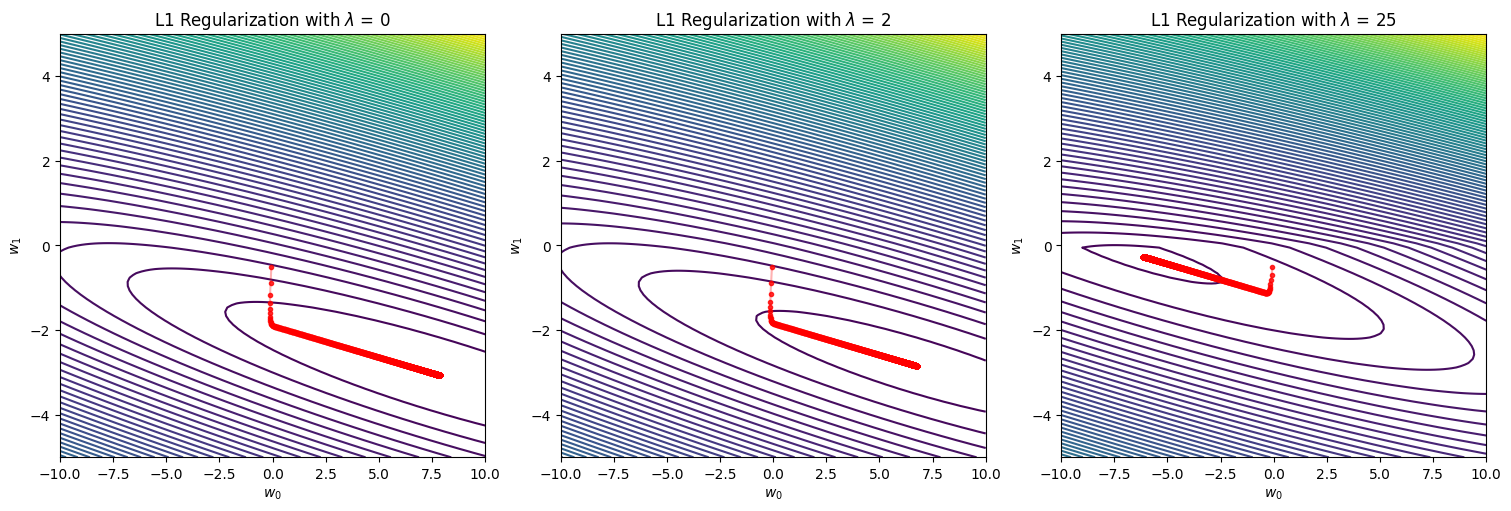

In [ ]:
cost = lambda w, reg: .5*np.mean((w[0] + w[1]*x - y)**2) + reg*np.sum(np.abs(w[1])) #l1 regularization
reg_list = [0, 2, 25]
fig, axes = plt.subplots(ncols=len(reg_list), nrows=1, constrained_layout= True, figsize=(15,5))

for i, reg_coef in enumerate(reg_list):
  optimizer = GradientDescent(learning_rate=.008, max_iters = 50000, record_history=True)
  model = LinearRegression(reg_type='l1', lambdaa=reg_coef)
  model.fit(x, y, optimizer)
  current_cost = lambda w: cost(w, reg_coef)
  plot_contour(current_cost, [-10, 10], [-5, 5], 100, axes[i])
  w_hist = np.vstack(optimizer.w_history)
  axes[i].plot(w_hist[:,0], w_hist[:,1], '.r', alpha=.8)
  axes[i].plot(w_hist[:,0], w_hist[:,1], '-r', alpha=.3)
  axes[i].set_xlabel(r'$w_0$')
  axes[i].set_ylabel(r'$w_1$')
  axes[i].set_title(f'L1 Regularization with $\lambda$ = {reg_coef}')
  axes[i].set_xlim([-10,10])
  axes[i].set_ylim([-5,5])

plt.savefig("l1_regularization_contour.png")

plt.show()

# Extension: Sigmoid Bases with piece-wise function

In [ ]:
def transform_sigmoid_basis(x, n_basis, x_min, x_max):

    centers = np.linspace(x_min, x_max, n_basis)
    width = 0.3

    basis = 1 / (1 + np.exp(-(x.reshape(-1, 1) - centers.reshape(1, -1)) / width))
    return basis



/tmp/ipython-input-1522447771.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


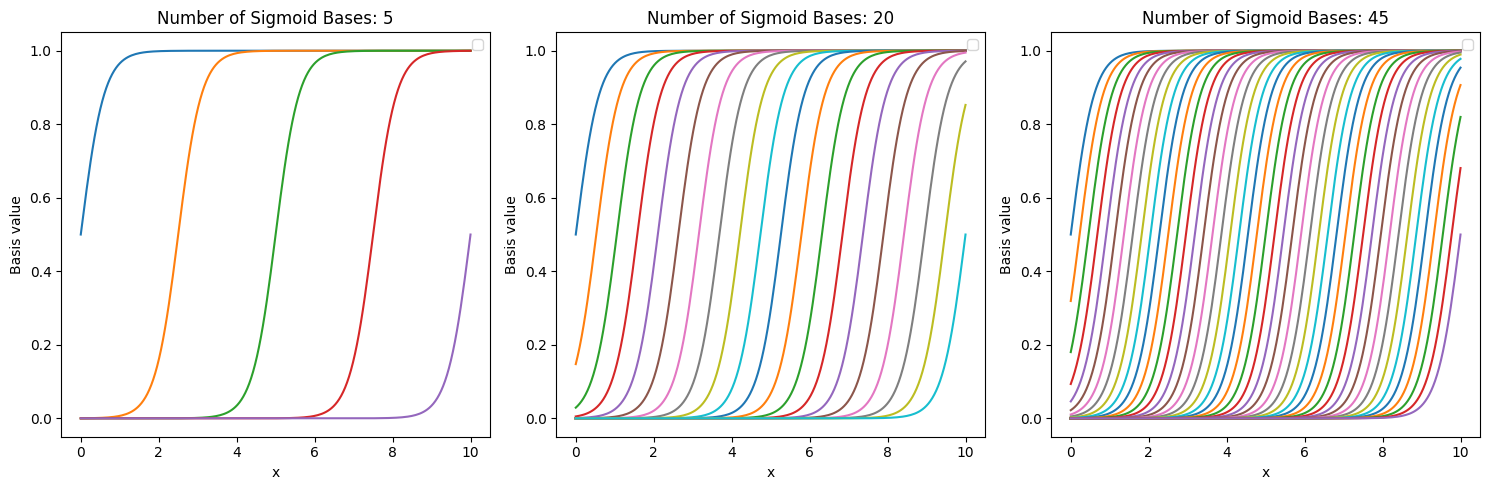

In [ ]:
x_min, x_max = 0, 10
x = np.linspace(x_min, x_max, 200)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes = axes.flatten()

n_basis_values = [5, 20, 45]

for idx, n_basis in enumerate(n_basis_values):
    basis = transform_sigmoid_basis(x, n_basis, x_min, x_max)

    ax = axes[idx]
    for i in range(n_basis):
        ax.plot(x, basis[:, i])

    ax.set_title(f'Number of Sigmoid Bases: {n_basis}')
    ax.set_xlabel('x')
    ax.set_ylabel('Basis value')
    ax.legend()

plt.tight_layout()

plt.savefig("sigmoid_bases.svg")
plt.show()

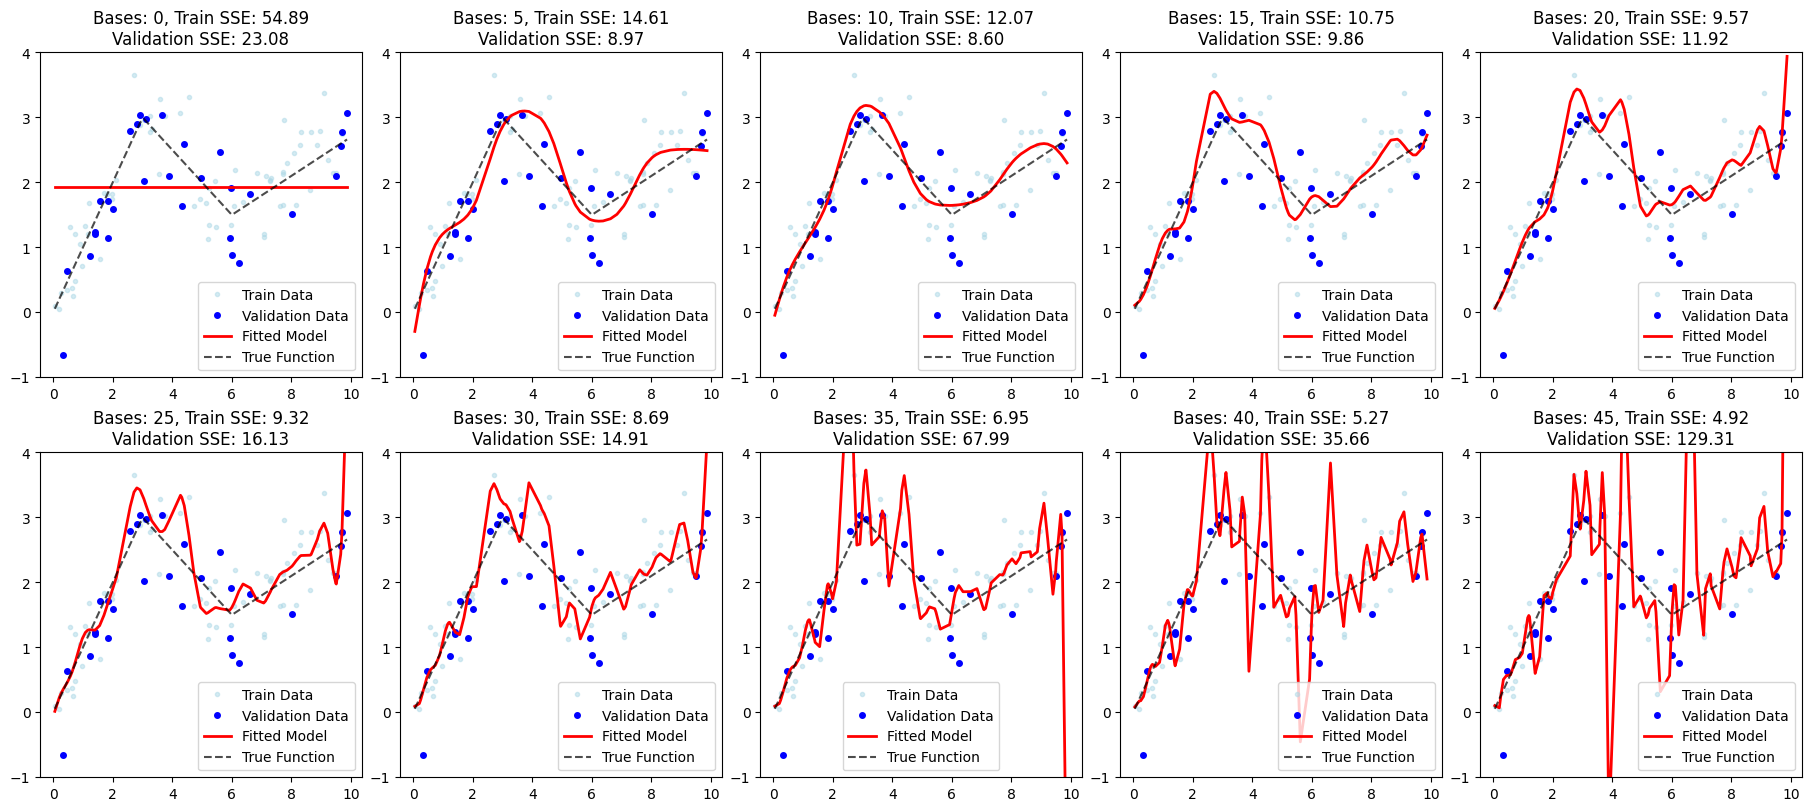

In [ ]:
def piecewise_linear(x):
    y = np.zeros_like(x)
    y[x < 3] = x[x < 3]
    y[(x >= 3) & (x < 6)] = 3 - 0.5 * (x[(x >= 3) & (x < 6)] - 3)
    y[x >= 6] = 1.5 + 0.3 * (x[x >= 6] - 6)
    return y

np.random.seed(42)
x = np.sort(np.random.uniform(0,10,100))
y_true = piecewise_linear(x)
y_noisy = y_true + np.random.normal(0, 0.5, size)
fig, axes = plt.subplots(2, 5, figsize=(18, 8), constrained_layout=True)
axes = axes.flatten()



n = len(x)
indices = np.random.permutation(n)
train_size = int(0.7 * n)
train_idx = np.sort(indices[:train_size])
validation_idx = np.sort(indices[train_size:])

x_train, x_validation = x[train_idx], x[validation_idx]
y_train, y_validation = y_noisy[train_idx], y_noisy[validation_idx]
y_true_train, y_true_validation = y_true[train_idx], y_true[validation_idx]


basis_counts = np.arange(0, 50, 5)

# fig, axes = plt.subplots(2, 5, figsize=(18, 8), constrained_layout=True)
# axes = axes.flatten()

basis_counts = np.arange(0, 50, 5)

for i, n_basis in enumerate(basis_counts):
    ax = axes[i]

    if n_basis == 0:
        X_train = np.ones((len(x_train), 1))
        X_validation = np.ones((len(x_validation), 1))
    else:
        x_min, x_max = x.min(), x.max()
        gaussian_train = transform_sigmoid_basis(x_train, n_basis, x_min, x_max)
        gaussian_validation = transform_sigmoid_basis(x_validation, n_basis, x_min, x_max)

        X_train = np.concatenate((np.ones((len(x_train), 1)), gaussian_train), axis=1)
        X_validation = np.concatenate((np.ones((len(x_validation), 1)), gaussian_validation), axis=1)

    w = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ y_train

    y_pred_train = X_train @ w
    y_pred_validation = X_validation @ w

    train_sse = np.sum((y_pred_train - y_train) ** 2)
    validation_sse = np.sum((y_pred_validation - y_validation) ** 2)

    ax.plot(x_train, y_train, 'o', markersize=3, alpha=0.5, label='Train Data', color='lightblue')
    ax.plot(x_validation, y_validation, 'o', markersize=4, label='Validation Data', color='blue')



    if n_basis == 0:
        X_plot = np.ones((len(x), 1))
    else:
        sigmoid_plot = transform_sigmoid_basis(x, n_basis, x_min, x_max)
        X_plot = np.concatenate((np.ones((len(x), 1)), sigmoid_plot), axis=1)

    y_pred_plot = X_plot @ w

    ax.plot(x, y_pred_plot, 'r-', linewidth=2, label='Fitted Model')
    ax.plot(x, y_true, 'k--', linewidth=1.5, label='True Function', alpha=0.7)



    ax.set_title(f'Bases: {n_basis}, Train SSE: {train_sse:.2f}\nValidation SSE: {validation_sse:.2f}')
    ax.legend()
    ax.set_ylim([-1, 4])

plt.savefig("sigmoid_regression.svg")

plt.show()

